In [1]:
pip install jpype1

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install konlpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
president_speech = open('speech_moon.txt', encoding = 'UTF-8').read()

In [4]:
import re

In [5]:
president_speech = re.sub('[^가-힣]', ' ', president_speech)

In [7]:
import konlpy
hannanum = konlpy.tag.Hannanum()

In [9]:
hannanum.pos("대한민국의 영토는 한반도와 그 부속도서로 한다.")

[('대한민국', 'N'),
 ('의', 'J'),
 ('영토', 'N'),
 ('는', 'J'),
 ('한반도', 'N'),
 ('와', 'J'),
 ('그', 'M'),
 ('부속도서', 'N'),
 ('로', 'J'),
 ('하', 'P'),
 ('ㄴ다', 'E'),
 ('.', 'S')]

In [10]:
hannanum.tagset

{'E': '어미',
 'EC': '연결 어미',
 'EF': '종결 어미',
 'EP': '선어말어미',
 'ET': '전성 어미',
 'F': '외국어',
 'I': '독립언',
 'II': '감탄사',
 'J': '관계언',
 'JC': '격조사',
 'JP': '서술격 조사',
 'JX': '보조사',
 'M': '수식언',
 'MA': '부사',
 'MM': '관형사',
 'N': '체언',
 'NB': '의존명사',
 'NC': '보통명사',
 'NN': '수사',
 'NP': '대명사',
 'NQ': '고유명사',
 'P': '용언',
 'PA': '형용사',
 'PV': '동사',
 'PX': '보조 용언',
 'S': '기호',
 'X': '접사',
 'XP': '접두사',
 'XS': '접미사'}

In [11]:
hannanum.nouns("대한민국의 영토는 한반도와 그 부속도서로 한다")

['대한민국', '영토', '한반도', '부속도서']

In [12]:
hannanum.morphs("대한민국의 영토는 한반도와 그 부속도서로 한다")

['대한민국', '의', '영토', '는', '한반도', '와', '그', '부속도서', '로', '하', 'ㄴ다']

In [13]:
nouns = hannanum.nouns(president_speech)
nouns[:20]

['정권교체',
 '정치교체',
 '시대교체',
 '불비불명',
 '고사',
 '남쪽',
 '언덕',
 '나뭇가지',
 '년',
 '동안',
 '새',
 '한번',
 '하늘',
 '끝',
 '한번',
 '천지',
 '동안',
 '정치',
 '거리',
 '암울한']

In [14]:
import pandas as pd
df_word = pd.DataFrame( {'word' : nouns})
df_word

,word
0,정권교체
1,정치교체
2,시대교체
3,불비불명
4,고사
...,...
1408,모두
1409,주인
1410,진정한
1411,우리나라


In [29]:
top20 = df_word.head(20)
top20

,word,n
153,나라,19
462,일자리,19
116,국민,18
422,우리,17
198,대통령,12
202,대한민국,11
693,확대,11
525,정치,10
423,우리나라,10
304,사회,9


<AxesSubplot:xlabel='n', ylabel='word'>

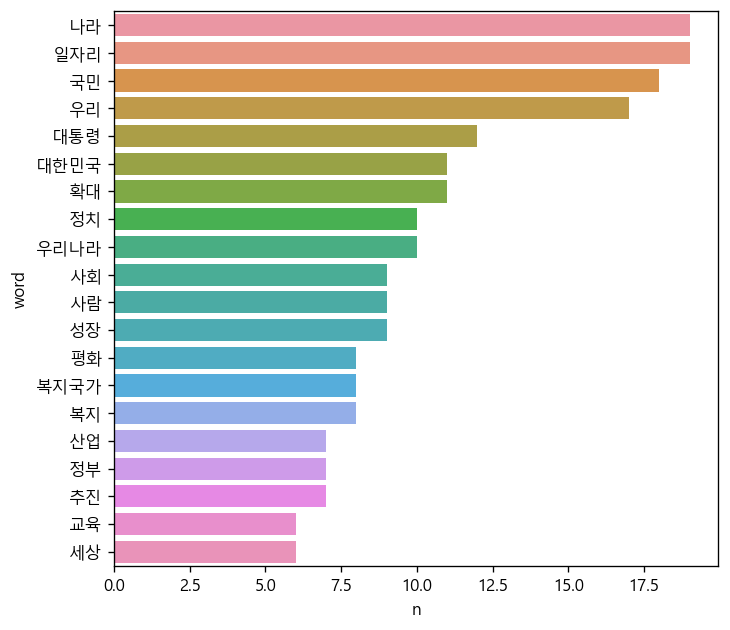

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams.update( {'font.family' : 'malgun Gothic',
                      'figure.dpi' : '120',
                      'figure.figsize' : [6.5, 6]})
sns.barplot(data=top20, y='word',x='n')

In [26]:
df_word['word_n'] = df_word['word'].str.len()
df_word

,word,word_n
0,정권교체,4
1,정치교체,4
2,시대교체,4
3,불비불명,4
4,고사,2
...,...,...
1408,모두,2
1409,주인,2
1410,진정한,3
1411,우리나라,4


In [27]:
df_word = df_word.query('word_n >= 2')
df_word.sort_values('word')

,word,word_n
752,가동,2
1164,가사,2
275,가슴,2
1356,가슴,2
1179,가족,2
...,...,...
195,희망,2
1015,희망,2
1074,희망,2
1128,희생,2


In [28]:
df_word = df_word.groupby('word', as_index=False)\
    .agg(n = ('word', 'count'))\
    .sort_values('n', ascending=False)

In [31]:
!pip install wordcloud

In [37]:
font =  'DoHyeon-Regular.ttf'

In [38]:
df_word.head()

,word,n
153,나라,19
462,일자리,19
116,국민,18
422,우리,17
198,대통령,12


In [39]:
dic_word = df_word.set_index('word').to_dict()['n']
dic_word

{'나라': 19,
 '일자리': 19,
 '국민': 18,
 '우리': 17,
 '대통령': 12,
 '대한민국': 11,
 '확대': 11,
 '정치': 10,
 '우리나라': 10,
 '사회': 9,
 '사람': 9,
 '성장': 9,
 '평화': 8,
 '복지국가': 8,
 '복지': 8,
 '산업': 7,
 '정부': 7,
 '추진': 7,
 '교육': 6,
 '세상': 6,
 '경쟁': 6,
 '보통사람들': 5,
 '공평': 5,
 '경제': 5,
 '대통령의': 5,
 '상생': 5,
 '정규직': 5,
 '정의': 4,
 '결과': 4,
 '사회적': 4,
 '투자': 4,
 '주인': 4,
 '전환': 4,
 '때문': 4,
 '모델': 4,
 '요구': 4,
 '희망': 4,
 '창출': 4,
 '역사': 4,
 '기회': 4,
 '여성': 4,
 '담쟁': 4,
 '강화': 4,
 '아래': 4,
 '고통': 4,
 '약자': 4,
 '아이들': 4,
 '중소기업': 4,
 '공정': 3,
 '문재인': 3,
 '특권': 3,
 '국가': 3,
 '사람들': 3,
 '노인': 3,
 '변화': 3,
 '비중': 3,
 '교육혁신': 3,
 '관계': 3,
 '질서': 3,
 '군대': 3,
 '지원': 3,
 '과도한': 3,
 '권력': 3,
 '부담': 3,
 '그것': 3,
 '지방': 3,
 '국민들': 3,
 '채택': 3,
 '소수': 3,
 '세계': 3,
 '신산업': 3,
 '시민': 3,
 '개선': 3,
 '혁신': 3,
 '혁명': 3,
 '양극화': 3,
 '원칙': 3,
 '활용': 3,
 '행복': 3,
 '원전': 3,
 '에너지': 3,
 '경제성장': 3,
 '세금': 3,
 '이명박': 3,
 '성장전략': 3,
 '가치': 3,
 '가지': 3,
 '여러분': 3,
 '강자': 3,
 '진정한': 2,
 '노동자들': 2,
 '마음속': 2,
 '노력': 2,
 '만큼': 2,
 '육성': 2,
 '모두

In [40]:
from wordcloud import WordCloud

In [42]:
wc = WordCloud(random_state = 1234,
                font_path = font,
                width = 400,
                height = 400,
                background_color = 'white')
img_wordcloud = wc.generate_from_frequencies(dic_word)

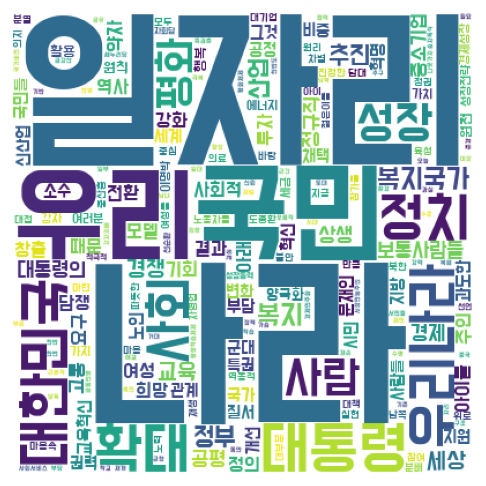

In [43]:
plt.figure(figsize = (5,5))
plt.axis('off')
plt.imshow(img_wordcloud)

In [48]:
import PIL
import numpy as np

In [46]:
icon = PIL.Image.open('cloud1.png')

In [47]:
icon.show()

In [49]:
img = np.array(icon)

In [50]:
wc = WordCloud(random_state = 1234,
              font_path = font,
              width = 400,
              height = 400,
              contour_width=3,
              contour_color='steeblue',
              background_color = 'white',
              mask = img)
type(wc)

wordcloud.wordcloud.WordCloud

In [51]:
img_wordcloud = wc.generate_from_frequencies(dic_word)

ValueError: unknown color specifier: 'steeblue'

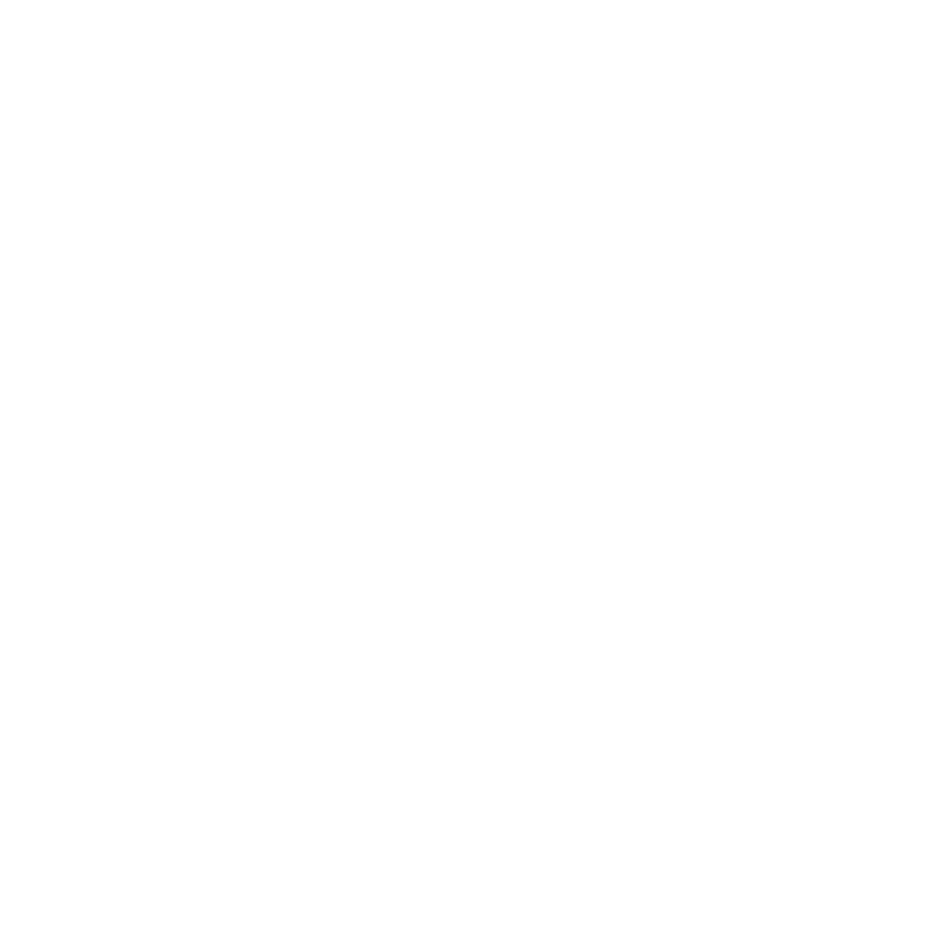

In [55]:
img_wordcloud = wc.generate_from_frequencies(dic_word)
plt.figure(figsize = (10,10))
plt.axis('off')
plt.imshow(img_wordcloud)